### **Dataset Overview**
The dataset contains **378 columns**, which can be divided into the following:
1. **FID**: Likely a unique identifier for each record (could represent users, devices, locations, etc.).
2. **Day_1 to Day_365**: Presumably daily data spanning an entire year. Each column likely represents a measurement or observation for a specific day.
3. **Unnamed: 377**: This could be a leftover artifact from the data preparation process. Often, it is an empty or misnamed column that might need attention or removal.

---

### **Potential Characteristics of the Dataset**
Based on the structure:
- **Time-Series Nature**: The dataset seems to represent time-series data with daily granularity.
- **365 Days of Observations**: This suggests that it tracks an entire year's worth of data.
- **FID as a Key Field**: If FID is unique for each row, it likely acts as the primary key for distinguishing individual records.

---

### **Possible Use Cases**
Here are potential use cases depending on the context of the data:

#### **1. Tracking Performance Over Time**
   - If the data captures metrics like productivity, resource usage, or system performance, it could help identify trends, seasonal patterns, or anomalies over the year.

#### **2. Forecasting**
   - This dataset can be used for **time-series forecasting**. For example:
     - Predicting future daily metrics based on historical trends.
     - Forecasting demand, energy usage, sales, etc.

#### **3. Behavior or Usage Analysis**
   - If each FID represents users, devices, or entities, the dataset can be used to analyze:
     - Daily engagement or usage patterns.
     - Long-term behavioral changes or periodic fluctuations.

#### **4. Seasonal Trend Analysis**
   - Identify seasonal trends or recurring patterns (e.g., increased activity during weekends or holidays).
   - This could be useful for businesses or organizations trying to optimize resource allocation during peak times.

#### **5. Anomaly Detection**
   - Using historical trends to detect anomalies:
     - Abnormal spikes/drops in daily metrics.
     - Identify records that deviate significantly from normal behavior.

#### **6. Clustering and Segmentation**
   - Cluster FIDs based on similar behavior or trends over the year. For example:
     - Group customers based on their activity patterns (consistent vs sporadic users).
     - Identify similar devices/entities based on their daily usage profiles.

#### **7. Missing Data or Data Quality Checks**
   - Inspect for missing or inconsistent values (especially in the "Unnamed: 377" column) to improve data reliability.
   - Evaluate how complete each row is and its potential impact on further analysis.

---

### **Steps for Analysis**
Here’s how to proceed with this dataset:

#### **1. Exploratory Data Analysis (EDA)**
   - **Summary Statistics**: Check the mean, median, min, max, and standard deviation for daily data.
   - **Missing Data**: Identify and handle any missing values.
   - **Visualization**: 
     - Plot trends for individual FIDs.
     - Aggregate trends (e.g., average across all FIDs for each day).
   - **Distribution Analysis**: Examine the distribution of daily values to identify skewness or outliers.

#### **2. Time-Series Analysis**
   - **Decomposition**: Break data into trend, seasonal, and residual components.
   - **Moving Averages**: Smooth data to identify overarching trends.
   - **Seasonality Detection**: Use techniques like autocorrelation to find periodic patterns.

#### **3. Machine Learning Use Cases**
   - Apply models such as ARIMA, LSTM, or Prophet for forecasting future values.
   - Use clustering algorithms (e.g., k-means) to segment data into meaningful groups.

#### **4. Data Cleaning**
   - Address the "Unnamed: 377" column—it might need to be removed or properly renamed.
   - Ensure all "Day_X" columns are correctly labeled and free of inconsistencies.

#### **5. Insights and Recommendations**
   - Provide actionable insights based on observed trends or patterns.
   - Highlight significant anomalies or deviations.

---

### **Next Steps**
To tailor this analysis further:
1. **Clarify Context**: What does each row and column represent? For example, is this user behavior, system performance, etc.?
2. **Verify Data Quality**: Do all columns contain valid data? Any missing values or irregularities?
3. **Goals**: Are you looking for trends, forecasts, or specific insights?

Let me know more details, and I can refine this further or dive into specific areas!

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
file_path="/home/udit/Documents/Github/ISSA/rainfall_data_analysis/rerainfall_data_1901_1999/1901uk.xlsx"
df =  pd.read_excel(file_path,header=1)

In [ ]:
# Overview of the dataset
print("Dataset Overview")
print("-" * 50)
print(f"Shape of dataset: {df.shape}")
print("Column Names:")
print(df.columns)

# Check for the "Unnamed" column and remove if necessary
if "Unnamed: 377" in df.columns:
    print("\n'Unnamed: 377' column detected. Dropping it...")
    df = df.drop(columns=["Unnamed: 377"])



In [ ]:
# Check for missing values
print("\nMissing Data Overview:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Basic summary statistics for all columns
print("\nSummary Statistics:")
print(df.describe())

In [ ]:
# Check FID column
if "FID" in df.columns:
    print("\nUnique FID values:", df["FID"].nunique())

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("\nNumber of duplicate rows:", duplicate_rows.shape[0])



Detected 365 time-series columns (Day_1 to Day_365).


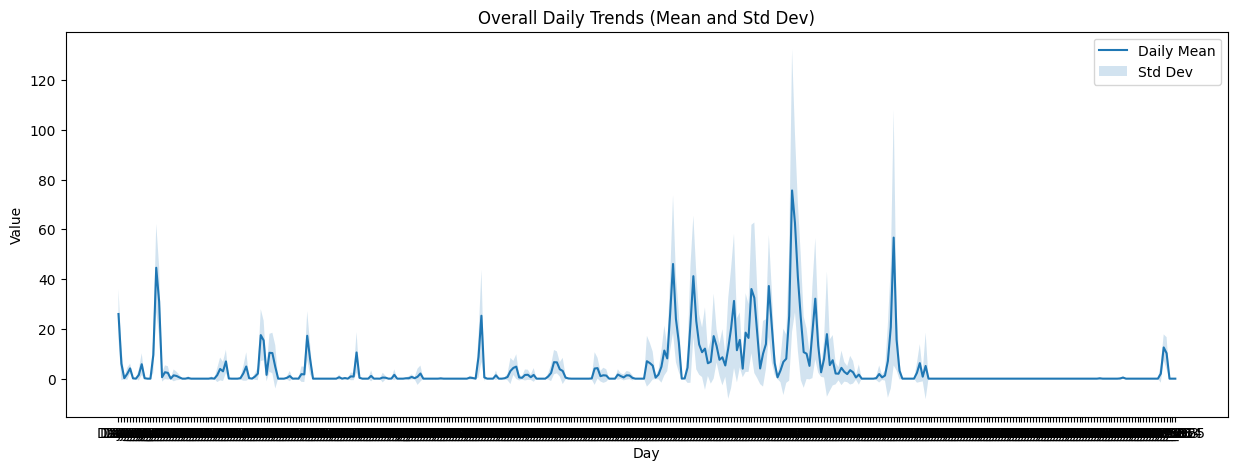


Decomposing the first FID's time-series data for seasonal analysis:


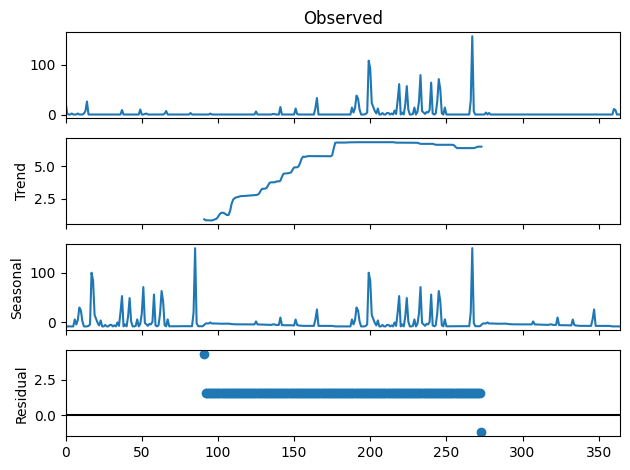

In [18]:
# Handling time-series columns (Day_1 to Day_365)
time_series_cols = [col for col in df.columns if col.startswith("Day_")]
if time_series_cols:
    print(f"\nDetected {len(time_series_cols)} time-series columns (Day_1 to Day_365).")

    # Calculate overall trends
    daily_means = df[time_series_cols].mean()
    daily_std = df[time_series_cols].std()

    # Plot the overall trend
    plt.figure(figsize=(15, 5))
    plt.plot(daily_means, label="Daily Mean")
    plt.fill_between(range(len(daily_means)), daily_means - daily_std, daily_means + daily_std, alpha=0.2, label="Std Dev")
    plt.title("Overall Daily Trends (Mean and Std Dev)")
    plt.xlabel("Day")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

    # Seasonal Decomposition Example (Assuming numeric data)
    print("\nDecomposing the first FID's time-series data for seasonal analysis:")
    first_fid_series = df.loc[0, time_series_cols].values
    result = seasonal_decompose(first_fid_series, period=182, model='additive')

    # Plot decomposition
    result.plot()
    plt.show()


Distribution Analysis:


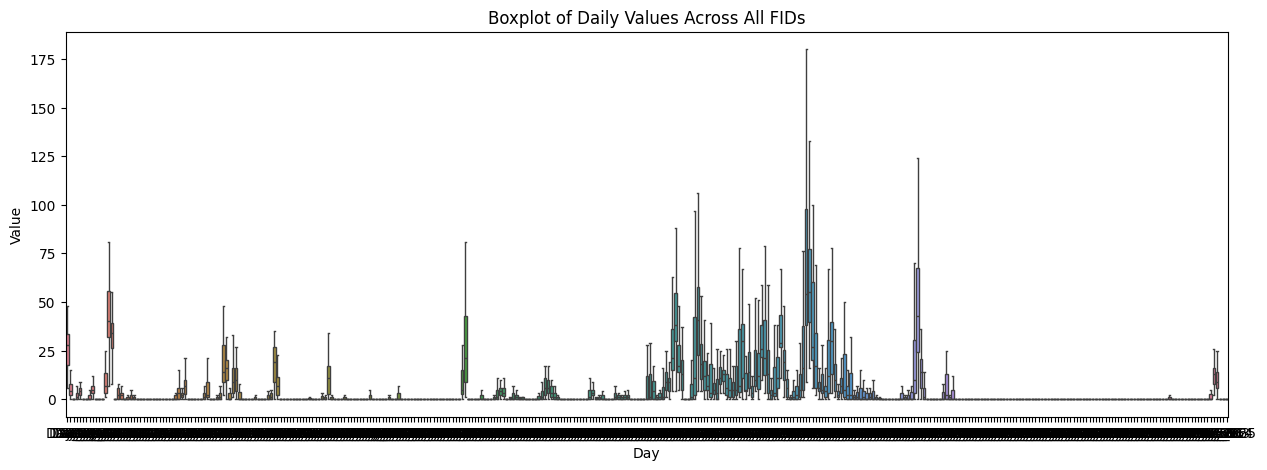

In [14]:
# Distribution of daily values
print("\nDistribution Analysis:")
plt.figure(figsize=(15, 5))
sns.boxplot(data=df[time_series_cols], showfliers=False)
plt.title("Boxplot of Daily Values Across All FIDs")
plt.xlabel("Day")
plt.ylabel("Value")
plt.show()


In [15]:

# Detecting anomalies: Simple threshold-based
print("\nAnomaly Detection:")
threshold = daily_means.mean() + 3 * daily_std.mean()
anomalies = df[time_series_cols].apply(lambda x: x > threshold)
anomaly_count = anomalies.sum().sum()
print(f"Total anomalies detected: {anomaly_count}")



Anomaly Detection:
Total anomalies detected: 2583


In [16]:
# Data Cleaning Suggestions
print("\nData Cleaning Suggestions:")
if missing_values.sum() > 0:
    print(f"Handle missing values in {missing_values[missing_values > 0].index.tolist()}.")
if duplicate_rows.shape[0] > 0:
    print("Consider removing duplicate rows.")
if "Unnamed: 377" in df.columns:
    print("Dropped 'Unnamed: 377' column.")




Data Cleaning Suggestions:
Handle missing values in ['FID', 'Day_1', 'Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Day_7', 'Day_8', 'Day_9', 'Day_10', 'Day_11', 'Day_12', 'Day_13', 'Day_14', 'Day_15', 'Day_16', 'Day_17', 'Day_18', 'Day_19', 'Day_20', 'Day_21', 'Day_22', 'Day_23', 'Day_24', 'Day_25', 'Day_26', 'Day_27', 'Day_28', 'Day_29', 'Day_30', 'Day_31', 'Unnamed: 32', 'Day_32', 'Day_33', 'Day_34', 'Day_35', 'Day_36', 'Day_37', 'Day_38', 'Day_39', 'Day_40', 'Day_41', 'Day_42', 'Day_43', 'Day_44', 'Day_45', 'Day_46', 'Day_47', 'Day_48', 'Day_49', 'Day_50', 'Day_51', 'Day_52', 'Day_53', 'Day_54', 'Day_55', 'Day_56', 'Day_57', 'Day_58', 'Day_59', 'Unnamed: 61', 'Day_60', 'Day_61', 'Day_62', 'Day_63', 'Day_64', 'Day_65', 'Day_66', 'Day_67', 'Day_68', 'Day_69', 'Day_70', 'Day_71', 'Day_72', 'Day_73', 'Day_74', 'Day_75', 'Day_76', 'Day_77', 'Day_78', 'Day_79', 'Day_80', 'Day_81', 'Day_82', 'Day_83', 'Day_84', 'Day_85', 'Day_86', 'Day_87', 'Day_88', 'Day_89', 'Day_90', 'Unnamed: 93', 'Da

In [ ]:
# Export Cleaned Dataset
cleaned_file_path = "cleaned_dataset.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to {cleaned_file_path}")